In [3]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
#file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [6]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [8]:
# select the top 15 countries that we are interested in
# Filter rows for each country and run model
#Code for this notebook is Israel
Israel_df = df2[df2['Country'] == 'Israel']


print(Israel_df)

    Country  Year  Expenditure_Constant_2022
378  Israel  2000                14260.84212
379  Israel  2001                14858.38495
380  Israel  2002                14864.21437
381  Israel  2003                14619.50578
382  Israel  2004                15107.81470
383  Israel  2005                15481.31872
384  Israel  2006                15716.24309
385  Israel  2007                17622.32024
386  Israel  2008                17846.24636
387  Israel  2009                17484.24090
388  Israel  2010                17607.26879
389  Israel  2011                17720.86576
390  Israel  2012                18063.45144
391  Israel  2013                18627.36457
392  Israel  2014                20053.92689
393  Israel  2015                20335.14527
394  Israel  2016                21412.68634
395  Israel  2017                22325.92298
396  Israel  2018                22602.38635
397  Israel  2019                22737.20328
398  Israel  2020                23685.71154
399  Israe

In [9]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
Israel_df2= Israel_df[['Year', 'Expenditure_Constant_2022']]
#Israel_df2.head()

# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
Israel_df2 = Israel_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
Israel_df2['ds'] = to_datetime(Israel_df2['ds'], format='%Y')
#Israel_df2.head()
# Fit the model by instantiating a new Prophet object
m = Prophet()
#Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.m.fit(df)
m.fit(Israel_df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_pkux_i/m96r2vb7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo_pkux_i/stdev9ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35535', 'data', 'file=/tmp/tmpo_pkux_i/m96r2vb7.json', 'init=/tmp/tmpo_pkux_i/stdev9ku.json', 'output', 'file=/tmp/tmpo_pkux_i/prophet_modeladnuz5ic/prophet_model-20241130230921.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:09:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:09:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [10]:
future = m.make_future_dataframe(periods=10, freq = "Y", include_history= True)
future.tail()

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
29,2028-12-31
30,2029-12-31
31,2030-12-31
32,2031-12-31
33,2032-12-31


In [11]:
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])



           ds          yhat    yhat_lower    yhat_upper
0  2000-01-01  13875.870628  12741.455596  14907.141250
1  2001-01-01  14012.037776  12873.700021  15056.025159
2  2002-01-01  14525.721096  13487.925023  15633.790922
3  2003-01-01  15038.635376  13964.259437  16189.570802
4  2004-01-01  15550.517868  14454.991597  16632.315507
5  2005-01-01  15686.685016  14545.450291  16899.893206
6  2006-01-01  16200.368336  15046.681857  17285.814569
7  2007-01-01  16713.282615  15515.402202  17851.232658
8  2008-01-01  17225.165109  16091.810213  18301.472560
9  2009-01-01  17361.332261  16249.097094  18527.797908
10 2010-01-01  17875.015883  16748.186293  19002.836028
11 2011-01-01  18388.383139  17288.498577  19518.953307
12 2012-01-01  18901.057147  17769.561015  19939.699558
13 2013-01-01  19257.777060  18196.486419  20383.625770
14 2014-01-01  19991.692421  18868.786740  21140.344734
15 2015-01-01  20725.679060  19668.269245  21744.817593
16 2016-01-01  21459.179420  20373.596919  22621

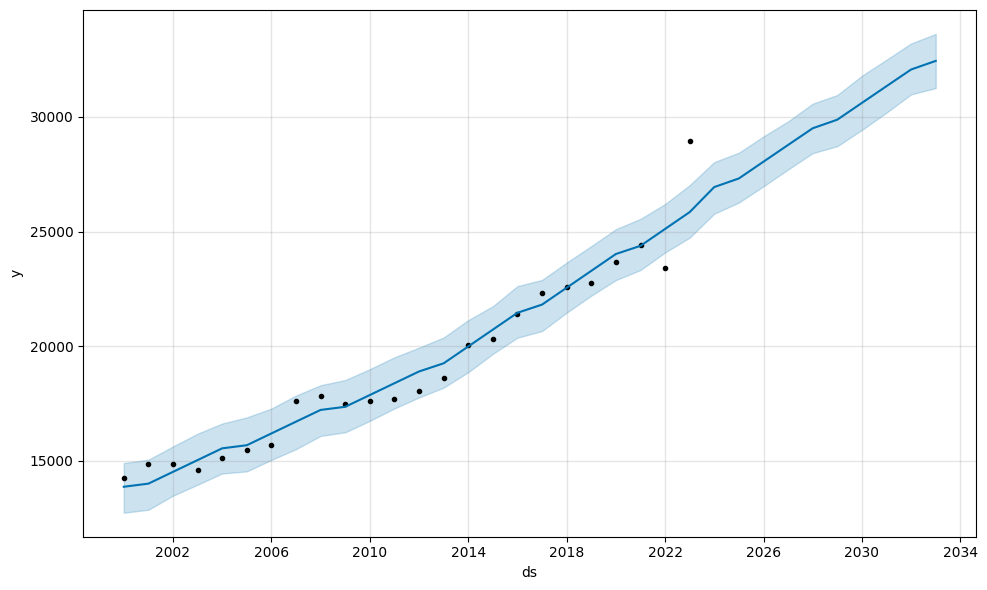

In [12]:
fig1 = m.plot(forecast)

Outlier for 2023 most likely due to ongoing Israel and Palestine conflict that started in October of 2023